# Import Libraries

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa
...,...,...,...,...,...
145,6.700,3.000,5.200,2.300,virginica
146,6.300,2.500,5.000,1.900,virginica
147,6.500,3.000,5.200,2.000,virginica
148,6.200,3.400,5.400,2.300,virginica


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


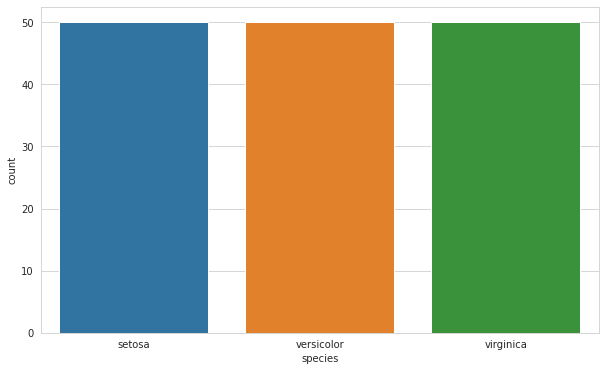

In [5]:
sns.countplot(df['species']);

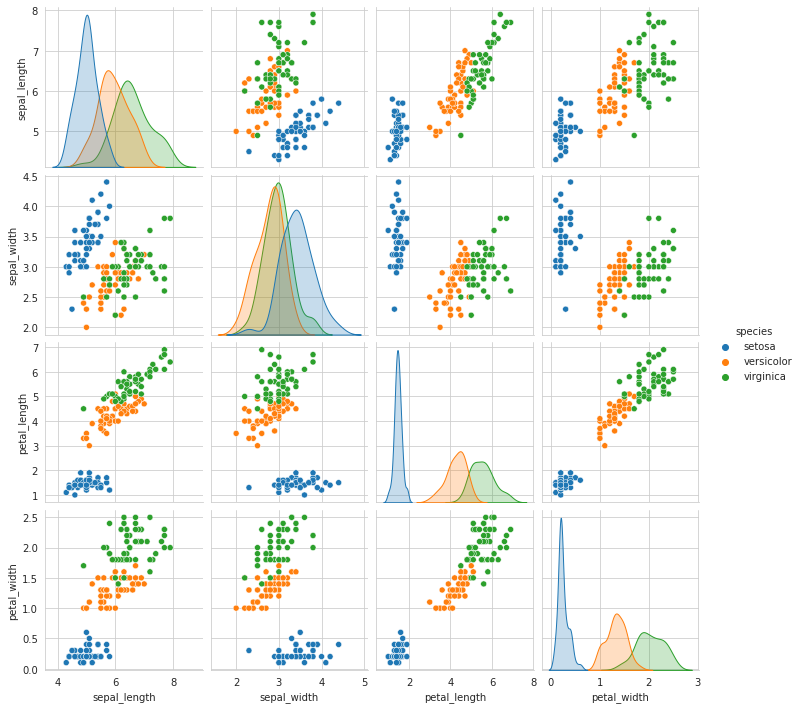

In [6]:
sns.pairplot(df,hue='species'); # Already everyone know iris dataset lol

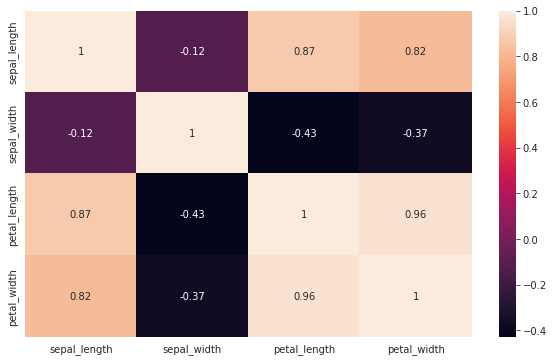

In [7]:
sns.heatmap(df.corr(),annot=True);

In [8]:
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [9]:
#Splitting the data into training and test
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values # We also do get dummies because we will use softmax.

In [11]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
y[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [16]:
y1[:5]

array([0, 0, 0, 0, 0])

In [18]:
Y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [44]:
len(X_test)

30

In [45]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=8,activation='tanh'))
model.add(Dense(units=6,activation='tanh'))
model.add(Dense(units=3,activation='softmax')) # We do get dummies so we need 3 output nodes.

In [46]:
opt = Adam(learning_rate = 0.03)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [47]:
model.fit(X_train , y_train , epochs = 200 , batch_size = 15 )

Epoch 1/200
8/8 [==============================] - 0s 3ms/step - loss: 1.0373 - accuracy: 0.5000
Epoch 2/200
8/8 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.6917
Epoch 3/200
8/8 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.6917
Epoch 4/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.7333
Epoch 5/200
8/8 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.9083
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8750
Epoch 7/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8917
Epoch 8/200
8/8 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8583
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.3598 - accuracy: 0.8000
Epoch 10/200
8/8 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8667
Epoch 11/200
8/8 [===========

In [48]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (15, 4)                   20        
                                                                 
 dense_5 (Dense)             (15, 8)                   40        
                                                                 
 dense_6 (Dense)             (15, 6)                   54        
                                                                 
 dense_7 (Dense)             (15, 3)                   21        
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [49]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 68ms/step


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [51]:
from tensorflow.keras.callbacks import EarlyStopping # It will effect very bad because small data.
from tensorflow.keras.layers import Dropout # This is the same.

In [52]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8,activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(units=6,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='softmax'))

In [53]:
opt = Adam(learning_rate = 0.006)                              
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=['accuracy']) 

In [54]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 35) 

In [55]:
model.fit(x = X_train, y = y_train,batch_size= 30, epochs=150, callbacks = [early_stop])

Epoch 1/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1331 - accuracy: 0.3333
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1278 - accuracy: 0.3167
Epoch 3/150
4/4 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.3583
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1416 - accuracy: 0.3583
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1487 - accuracy: 0.3250
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1467 - accuracy: 0.2750
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1232 - accuracy: 0.3333
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 1.1134 - accuracy: 0.3167
Epoch 9/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1153 - accuracy: 0.4000
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 1.1200 - accuracy: 0.3750
Epoch 11/150
4/4 [===========

In [56]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 72ms/step


In [57]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [58]:
y_pred_class

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0])

In [59]:
#from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class)) # Too bad results.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.00      0.00      0.00        13
           2       0.32      1.00      0.48         6

    accuracy                           0.57        30
   macro avg       0.44      0.67      0.49        30
weighted avg       0.43      0.57      0.46        30

[[11  0  0]
 [ 0  0 13]
 [ 0  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Final Model

In [60]:
model = Sequential()

model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=8,activation='tanh'))
model.add(Dense(units=6,activation='tanh'))
model.add(Dense(units=3,activation='softmax')) # We do get dummies so we need 3 output nodes.

In [61]:
opt = Adam(learning_rate = 0.03)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [62]:
model.fit(X_train , y_train , batch_size = 15 , epochs = 200 ,verbose = 2)

Epoch 1/200
8/8 - 0s - loss: 1.1810 - accuracy: 0.2667 - 437ms/epoch - 55ms/step
Epoch 2/200
8/8 - 0s - loss: 1.0564 - accuracy: 0.3917 - 20ms/epoch - 2ms/step
Epoch 3/200
8/8 - 0s - loss: 0.9240 - accuracy: 0.5917 - 20ms/epoch - 2ms/step
Epoch 4/200
8/8 - 0s - loss: 0.6715 - accuracy: 0.8250 - 21ms/epoch - 3ms/step
Epoch 5/200
8/8 - 0s - loss: 0.4808 - accuracy: 0.7667 - 20ms/epoch - 3ms/step
Epoch 6/200
8/8 - 0s - loss: 0.3846 - accuracy: 0.8250 - 19ms/epoch - 2ms/step
Epoch 7/200
8/8 - 0s - loss: 0.3029 - accuracy: 0.9417 - 26ms/epoch - 3ms/step
Epoch 8/200
8/8 - 0s - loss: 0.2641 - accuracy: 0.9250 - 20ms/epoch - 2ms/step
Epoch 9/200
8/8 - 0s - loss: 0.2368 - accuracy: 0.9000 - 25ms/epoch - 3ms/step
Epoch 10/200
8/8 - 0s - loss: 0.2992 - accuracy: 0.8333 - 21ms/epoch - 3ms/step
Epoch 11/200
8/8 - 0s - loss: 0.4032 - accuracy: 0.7833 - 20ms/epoch - 2ms/step
Epoch 12/200
8/8 - 0s - loss: 0.3308 - accuracy: 0.8333 - 19ms/epoch - 2ms/step
Epoch 13/200
8/8 - 0s - loss: 0.3173 - accuracy

In [63]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 65ms/step


In [64]:
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [65]:
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [66]:
#from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class)) # Too bad results.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Save final model

In [67]:
import joblib

In [68]:
joblib.dump(model , 'model.h5')

['model.h5']

In [ ]:
# Done